<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-Libaries" data-toc-modified-id="Loading-Libaries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading Libaries</a></span></li><li><span><a href="#Loading-Data" data-toc-modified-id="Loading-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading Data</a></span><ul class="toc-item"><li><span><a href="#Shuffling-the-Dataset" data-toc-modified-id="Shuffling-the-Dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Shuffling the Dataset</a></span></li></ul></li><li><span><a href="#EDA-+--Data-Preparation" data-toc-modified-id="EDA-+--Data-Preparation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA +  Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Summary-of-the-data" data-toc-modified-id="Summary-of-the-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Summary of the data</a></span></li><li><span><a href="#Excluding-Object-Values" data-toc-modified-id="Excluding-Object-Values-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Excluding Object Values</a></span></li><li><span><a href="#Splitting-Data" data-toc-modified-id="Splitting-Data-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Splitting Data</a></span></li><li><span><a href="#K-Fold-+-Feature-Importances" data-toc-modified-id="K-Fold-+-Feature-Importances-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>K Fold + Feature Importances</a></span></li></ul></li><li><span><a href="#Building-and-Evaluating-models" data-toc-modified-id="Building-and-Evaluating-models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Building and Evaluating models</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression-Classifier" data-toc-modified-id="Logistic-Regression-Classifier-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Logistic Regression Classifier</a></span></li><li><span><a href="#Random-Forest-Classifer" data-toc-modified-id="Random-Forest-Classifer-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Random Forest Classifer</a></span></li><li><span><a href="#Gradient-Boosting-Classifier" data-toc-modified-id="Gradient-Boosting-Classifier-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Gradient Boosting Classifier</a></span></li><li><span><a href="#XGBoost-Classifier" data-toc-modified-id="XGBoost-Classifier-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>XGBoost Classifier</a></span></li><li><span><a href="#LightGBM-Classifier" data-toc-modified-id="LightGBM-Classifier-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>LightGBM Classifier</a></span></li></ul></li><li><span><a href="#Saving-Model-For-Deployment" data-toc-modified-id="Saving-Model-For-Deployment-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Saving Model For Deployment</a></span></li></ul></div>

# Loading Libaries

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

# Machine learning
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm 

# Metrics
from sklearn.metrics import classification_report, confusion_matrix

# Seed (Random State)
SEED = 42

# Saving a Model 
import pickle

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Loading Data 

In [2]:
df = pd.read_csv('./data/test_music_features.csv')
df

,artist,artist_uri,artist_genre,album_name,album_uri,track_name,track_uri,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,time_signature,isWestern
0,BLACKPINK,spotify:artist:41MozSoPIsD1dJM0CLPjZF,"['k-pop', 'k-pop girl group']",THE ALBUM,spotify:album:71O60S5gIJSIAhdnrDIh3N,How You Like That,spotify:track:4SFknyjLcyTLJFPKD2m96o,0.812,0.800,11,...,0.0770,0.03750,0.000112,0.0638,0.357,130.036,180947,85,4,0
1,BLACKPINK,spotify:artist:41MozSoPIsD1dJM0CLPjZF,"['k-pop', 'k-pop girl group']",THE ALBUM,spotify:album:71O60S5gIJSIAhdnrDIh3N,Ice Cream (with Selena Gomez),spotify:track:4JUPEh2DVSXFGExu4Uxevz,0.785,0.719,4,...,0.3540,0.03740,0.000108,0.0519,0.887,159.953,175813,82,4,0
2,BLACKPINK,spotify:artist:41MozSoPIsD1dJM0CLPjZF,"['k-pop', 'k-pop girl group']",THE ALBUM,spotify:album:71O60S5gIJSIAhdnrDIh3N,Pretty Savage,spotify:track:1XnpzbOGptRwfJhZgLbmSr,0.695,0.583,9,...,0.0423,0.00657,0.000087,0.1040,0.382,152.001,199120,83,4,0
3,BLACKPINK,spotify:artist:41MozSoPIsD1dJM0CLPjZF,"['k-pop', 'k-pop girl group']",THE ALBUM,spotify:album:71O60S5gIJSIAhdnrDIh3N,Bet You Wanna (feat. Cardi B),spotify:track:7iAgNZdotu40NwtoIWJHFe,0.665,0.674,7,...,0.1610,0.00386,0.000000,0.0734,0.702,111.516,159173,84,4,0
4,BLACKPINK,spotify:artist:41MozSoPIsD1dJM0CLPjZF,"['k-pop', 'k-pop girl group']",THE ALBUM,spotify:album:71O60S5gIJSIAhdnrDIh3N,Lovesick Girls,spotify:track:4Ws314Ylb27BVsvlZOy30C,0.658,0.733,6,...,0.0586,0.00668,0.000000,0.1180,0.464,127.977,192760,86,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3698,Justin Timberlake,spotify:artist:31TPClRtHm23RisEBtV3X7,"['dance pop', 'pop']",LoveStoned,spotify:album:1tze7ApbUfn71mNcaixlX6,LoveStoned/I Think She Knows - Don Zee Remix,spotify:track:6D7DBoDFoJ76VLVtDwa7CR,0.703,0.738,5,...,0.0339,0.00440,0.098900,0.0667,0.372,127.010,277933,12,4,1
3699,Justin Timberlake,spotify:artist:31TPClRtHm23RisEBtV3X7,"['dance pop', 'pop']",LoveStoned,spotify:album:1tze7ApbUfn71mNcaixlX6,LoveStoned/I Think She Knows - Don Zee Remix -...,spotify:track:3zTU04mYmOmGiBBYW1Afj0,0.725,0.755,5,...,0.0317,0.00777,0.003180,0.2680,0.450,127.026,208747,10,4,1
3700,Justin Timberlake,spotify:artist:31TPClRtHm23RisEBtV3X7,"['dance pop', 'pop']",LoveStoned,spotify:album:1tze7ApbUfn71mNcaixlX6,LoveStoned/I Think She Knows Interlude - Femi ...,spotify:track:72Y2HKafWKIILRju52I2Fo,0.847,0.835,6,...,0.0716,0.01330,0.006140,0.0639,0.678,127.493,431107,9,4,1
3701,Justin Timberlake,spotify:artist:31TPClRtHm23RisEBtV3X7,"['dance pop', 'pop']",LoveStoned,spotify:album:1tze7ApbUfn71mNcaixlX6,LoveStoned/I Think She Knows Interlude - Femi ...,spotify:track:7l8B8DGCVfuz4IU2sH0XFr,0.797,0.863,6,...,0.0672,0.03360,0.001150,0.2790,0.769,127.492,260027,8,4,1


## Shuffling the Dataset

In [3]:
df = df.sample(frac=1).reset_index(drop=True)
df

,artist,artist_uri,artist_genre,album_name,album_uri,track_name,track_uri,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,time_signature,isWestern
0,One Direction,spotify:artist:4AK6F7OLvEQ5QYCBNiQWHq,"['boy band', 'pop', 'post-teen pop', 'talent s...",Made In The A.M. (Deluxe Edition),spotify:album:1gMxiQQSg5zeu4htBosASY,History,spotify:track:0HMjXBAZmSYOTTi33WpMso,0.655,0.699,11,...,0.0493,0.03520,0.000000,0.0640,0.802,86.704,187427,76,4,1
1,Got7,spotify:artist:6nfDaffa50mKtEOwR8g4df,"['k-pop', 'k-pop boy group']",FLIGHT LOG : ARRIVAL,spotify:album:5lWnDch4hAQ2Qx8zU2Lrxx,Don't care,spotify:track:7jKMhdrLMq4AeAYGNOBs0t,0.852,0.597,11,...,0.1120,0.08570,0.000000,0.1970,0.512,125.008,171146,3,4,0
2,One Direction,spotify:artist:4AK6F7OLvEQ5QYCBNiQWHq,"['boy band', 'pop', 'post-teen pop', 'talent s...",Midnight Memories,spotify:album:4k4apMN5EYs7S2q83BsXyR,Story of My Life - Live X Factor Performance,spotify:track:6Hi66DT944tTaUHn1h4E7e,0.450,0.807,3,...,0.0691,0.11200,0.000000,0.9270,0.185,120.952,258707,42,4,1
3,BTS,spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX,"['k-pop', 'k-pop boy group']",MAP OF THE SOUL : PERSONA,spotify:album:1AvXa8xFEXtR3hb4bgihIK,Boy With Luv (feat. Halsey),spotify:track:5KawlOMHjWeUjQtnuRs22c,0.645,0.862,11,...,0.0965,0.09230,0.000000,0.1920,0.798,119.991,229773,84,4,0
4,Got7,spotify:artist:6nfDaffa50mKtEOwR8g4df,"['k-pop', 'k-pop boy group']",FLIGHT LOG : ARRIVAL,spotify:album:5r30o1iIr8sdoRsu6qPKrK,OUT,spotify:track:3WhNAUZQkAXRBlGZO0gaWE,0.742,0.948,1,...,0.0884,0.02360,0.000000,0.0594,0.655,103.969,198869,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3698,Red Velvet,spotify:artist:1z4g3DjTBBZKhvAroFlhOM,"['k-pop', 'k-pop girl group']",The Perfect Red Velvet - The 2nd Album Repackage,spotify:album:0OkJThJls8FO1lutMzMDJ0,Kingdom Come,spotify:track:7frQ2zMByCc4UFOGzAIr3x,0.572,0.743,5,...,0.1200,0.23500,0.000006,0.0761,0.678,170.123,210162,46,4,0
3699,Stray Kids,spotify:artist:2dIgFjalVxs4ThymZ67YCE,"['k-pop', 'k-pop boy group']",UNVEIL Stray Kids,spotify:album:3J0GJ8PlNMjhP1y8LJnvvk,Grow Up,spotify:track:2V8YMzrt3ftkrB1p94yrqG,0.557,0.935,7,...,0.3220,0.19300,0.000000,0.3280,0.512,174.066,210965,35,4,0
3700,Ariana Grande,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,"['dance pop', 'pop', 'pop dance', 'post-teen p...",Dangerous Woman,spotify:album:0ku0TzH0npL8HjnnBSz90h,Bad Decisions,spotify:track:5Xm8XitGAgQT1y6Dyw3yRQ,0.697,0.643,4,...,0.0427,0.01490,0.000000,0.2800,0.817,131.960,226427,0,4,1
3701,One Direction,spotify:artist:4AK6F7OLvEQ5QYCBNiQWHq,"['boy band', 'pop', 'post-teen pop', 'talent s...",FOUR (Deluxe),spotify:album:4gCNyS7pidfK3rKWhB3JOY,Fireproof,spotify:track:34aYkYrY3sXhEU9O4VQgtB,0.681,0.864,3,...,0.0301,0.00477,0.000000,0.1220,0.921,132.929,174080,70,4,1


# EDA +  Data Preparation

## Summary of the data 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3703 entries, 0 to 3702
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            3703 non-null   object 
 1   artist_uri        3703 non-null   object 
 2   artist_genre      3703 non-null   object 
 3   album_name        3703 non-null   object 
 4   album_uri         3703 non-null   object 
 5   track_name        3703 non-null   object 
 6   track_uri         3703 non-null   object 
 7   danceability      3703 non-null   float64
 8   energy            3703 non-null   float64
 9   key               3703 non-null   int64  
 10  loudness          3703 non-null   float64
 11  mode              3703 non-null   int64  
 12  speechiness       3703 non-null   float64
 13  acousticness      3703 non-null   float64
 14  instrumentalness  3703 non-null   float64
 15  liveness          3703 non-null   float64
 16  valence           3703 non-null   float64


In [5]:
df.isnull().sum()

artist              0
artist_uri          0
artist_genre        0
album_name          0
album_uri           0
track_name          0
track_uri           0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
popularity          0
time_signature      0
isWestern           0
dtype: int64

## Excluding Object Values 

In [6]:
## Drop Object 
df = df.select_dtypes(exclude=['object'])
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,time_signature,isWestern
0,0.655,0.699,11,-4.421,1,0.0493,0.03520,0.000000,0.0640,0.802,86.704,187427,76,4,1
1,0.852,0.597,11,-4.377,0,0.1120,0.08570,0.000000,0.1970,0.512,125.008,171146,3,4,0
2,0.450,0.807,3,-5.148,1,0.0691,0.11200,0.000000,0.9270,0.185,120.952,258707,42,4,1
3,0.645,0.862,11,-4.757,0,0.0965,0.09230,0.000000,0.1920,0.798,119.991,229773,84,4,0
4,0.742,0.948,1,-1.737,1,0.0884,0.02360,0.000000,0.0594,0.655,103.969,198869,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3698,0.572,0.743,5,-3.991,0,0.1200,0.23500,0.000006,0.0761,0.678,170.123,210162,46,4,0
3699,0.557,0.935,7,-2.701,1,0.3220,0.19300,0.000000,0.3280,0.512,174.066,210965,35,4,0
3700,0.697,0.643,4,-5.399,0,0.0427,0.01490,0.000000,0.2800,0.817,131.960,226427,0,4,1
3701,0.681,0.864,3,-3.276,1,0.0301,0.00477,0.000000,0.1220,0.921,132.929,174080,70,4,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3703 entries, 0 to 3702
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      3703 non-null   float64
 1   energy            3703 non-null   float64
 2   key               3703 non-null   int64  
 3   loudness          3703 non-null   float64
 4   mode              3703 non-null   int64  
 5   speechiness       3703 non-null   float64
 6   acousticness      3703 non-null   float64
 7   instrumentalness  3703 non-null   float64
 8   liveness          3703 non-null   float64
 9   valence           3703 non-null   float64
 10  tempo             3703 non-null   float64
 11  duration_ms       3703 non-null   int64  
 12  popularity        3703 non-null   int64  
 13  time_signature    3703 non-null   int64  
 14  isWestern         3703 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 434.1 KB


## Splitting Data

In [8]:
X = df.drop(['isWestern'], axis=1)
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,time_signature
0,0.655,0.699,11,-4.421,1,0.0493,0.03520,0.000000,0.0640,0.802,86.704,187427,76,4
1,0.852,0.597,11,-4.377,0,0.1120,0.08570,0.000000,0.1970,0.512,125.008,171146,3,4
2,0.450,0.807,3,-5.148,1,0.0691,0.11200,0.000000,0.9270,0.185,120.952,258707,42,4
3,0.645,0.862,11,-4.757,0,0.0965,0.09230,0.000000,0.1920,0.798,119.991,229773,84,4
4,0.742,0.948,1,-1.737,1,0.0884,0.02360,0.000000,0.0594,0.655,103.969,198869,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3698,0.572,0.743,5,-3.991,0,0.1200,0.23500,0.000006,0.0761,0.678,170.123,210162,46,4
3699,0.557,0.935,7,-2.701,1,0.3220,0.19300,0.000000,0.3280,0.512,174.066,210965,35,4
3700,0.697,0.643,4,-5.399,0,0.0427,0.01490,0.000000,0.2800,0.817,131.960,226427,0,4
3701,0.681,0.864,3,-3.276,1,0.0301,0.00477,0.000000,0.1220,0.921,132.929,174080,70,4


In [9]:
y = df['isWestern']
y

0       1
1       0
2       1
3       0
4       0
       ..
3698    0
3699    0
3700    1
3701    1
3702    1
Name: isWestern, Length: 3703, dtype: int64

In [10]:
X_array = np.array(X)
X_array

array([[6.55000e-01, 6.99000e-01, 1.10000e+01, ..., 1.87427e+05,
        7.60000e+01, 4.00000e+00],
       [8.52000e-01, 5.97000e-01, 1.10000e+01, ..., 1.71146e+05,
        3.00000e+00, 4.00000e+00],
       [4.50000e-01, 8.07000e-01, 3.00000e+00, ..., 2.58707e+05,
        4.20000e+01, 4.00000e+00],
       ...,
       [6.97000e-01, 6.43000e-01, 4.00000e+00, ..., 2.26427e+05,
        0.00000e+00, 4.00000e+00],
       [6.81000e-01, 8.64000e-01, 3.00000e+00, ..., 1.74080e+05,
        7.00000e+01, 4.00000e+00],
       [6.69000e-01, 7.11000e-01, 8.00000e+00, ..., 1.72747e+05,
        1.10000e+01, 4.00000e+00]])

In [11]:
y_array = np.array(y)
y_array

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

## K Fold + Feature Importances 

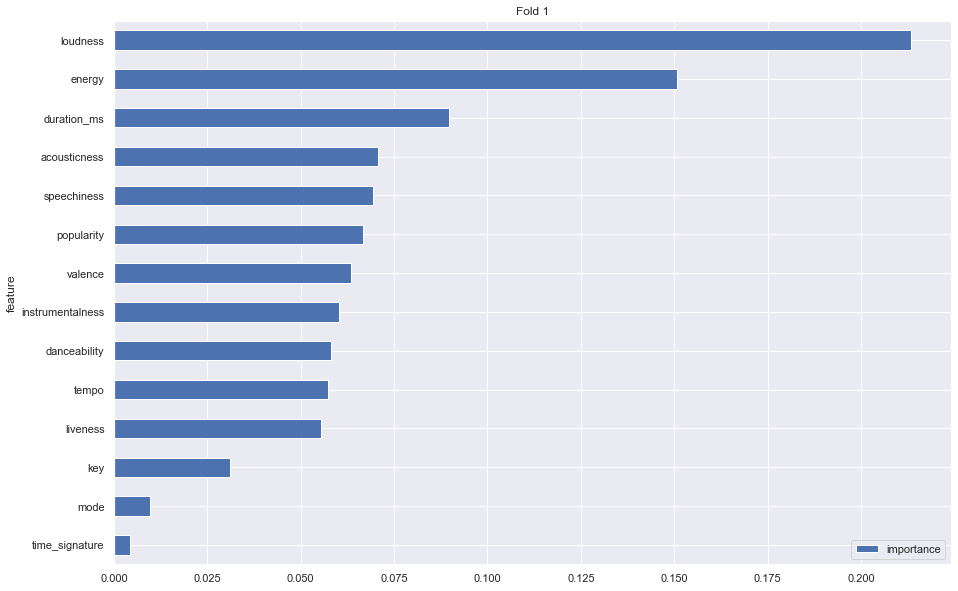

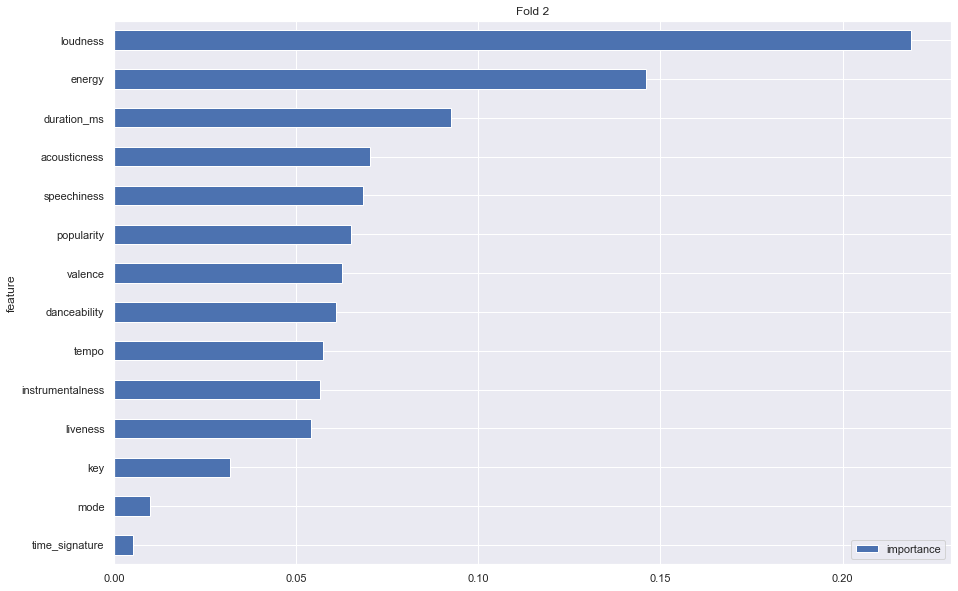

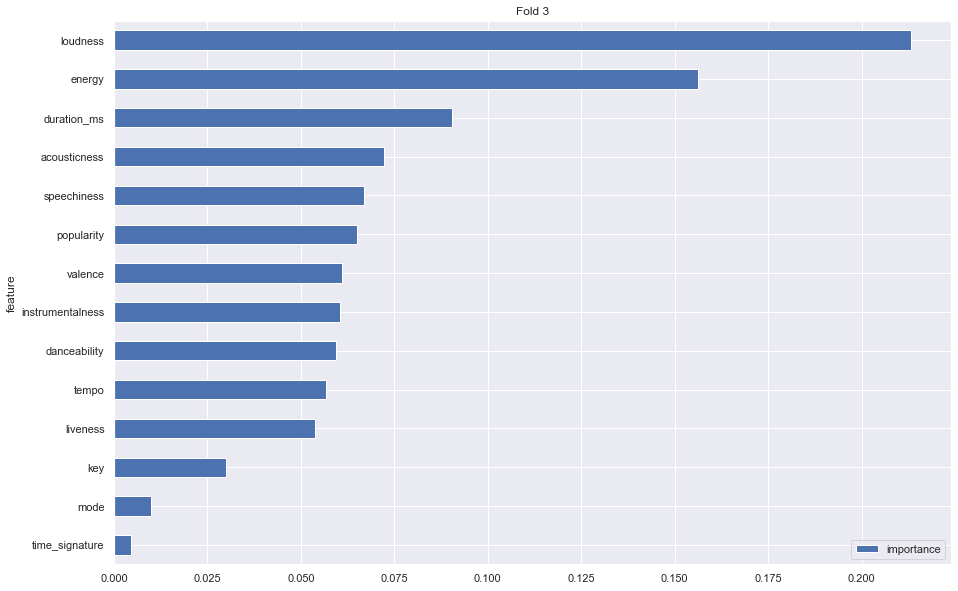

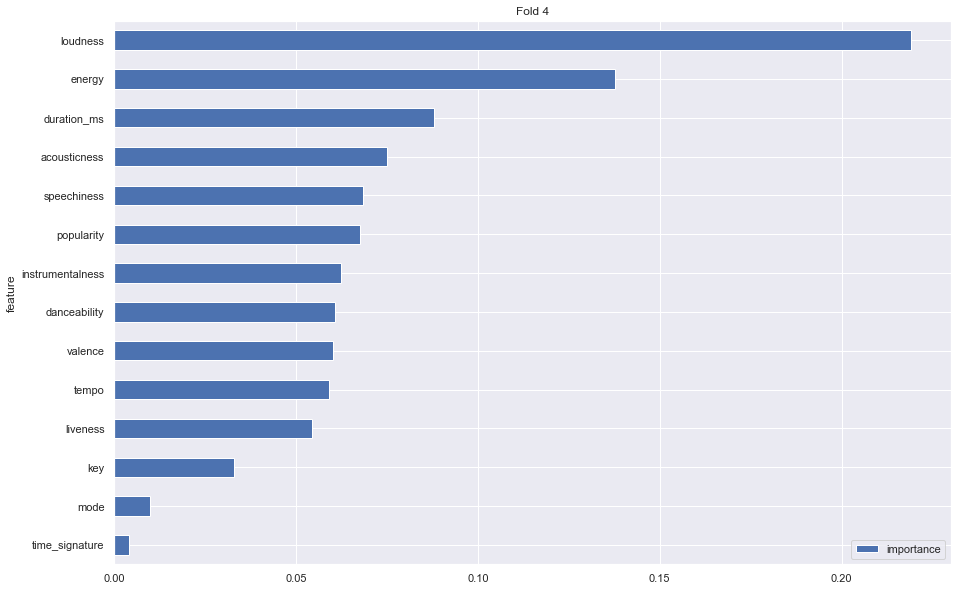

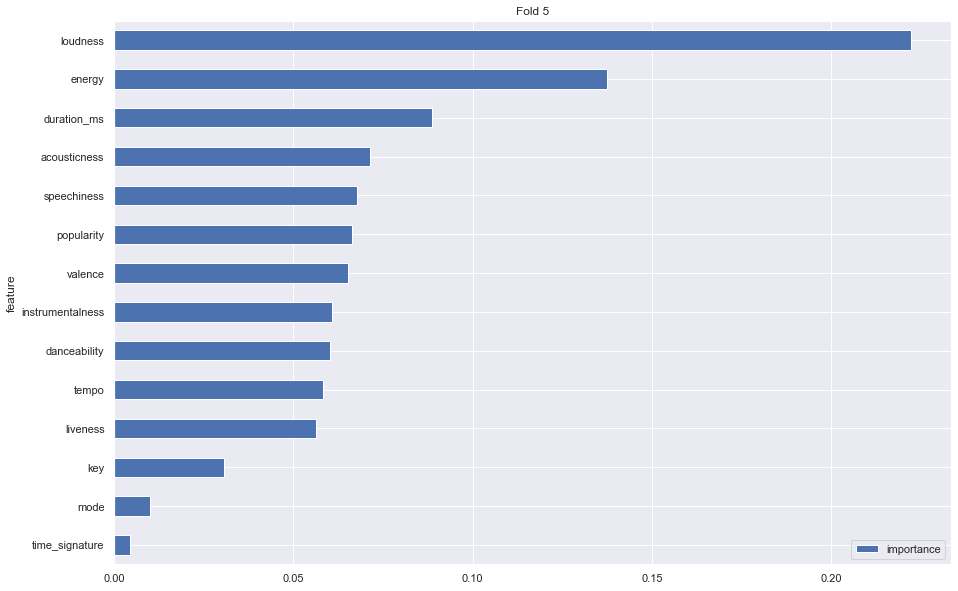

In [12]:
kf = KFold(n_splits=5, random_state=SEED)

i = 1

def determine_feature_importance(i, X_train, y_train, X_test, y_test):
    clf = RandomForestClassifier(random_state=42)
    clf = clf.fit(X_train, y_train)
    features = pd.DataFrame()
    features['feature'] = X.columns
    features['importance'] = clf.feature_importances_
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features.set_index('feature', inplace=True)
    features.plot(kind='barh', figsize=(15,10), title=f'Fold {i}')

for train_index, test_index in kf.split(X):
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]
    determine_feature_importance(i, X_train, y_train, X_test, y_test)
    i += 1

# Building and Evaluating models

In [13]:
def compute_cross_val(clf, X, y):
    avg_cross_val = np.mean(cross_val_score(clf, X, y, cv = 5, scoring='accuracy'))
    return avg_cross_val

def confusion_matrix_display(y, predicted_model, model_name):
    cm = confusion_matrix(y, predicted_model)
    
    group_names = ['True Negative','False Positive','False Negative','True Positive']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    print(f"Confusion Matrix for {model_name} cross validated:")

    sns.heatmap(cm, annot=labels, fmt='')

    plt.show()

## Logistic Regression Classifier

Cross Validation Score of LogisticRegression: 0.5930163767005872
Classification report for Logistic Regression: 
              precision    recall  f1-score   support

           0       0.59      0.54      0.57      1814
           1       0.59      0.64      0.62      1889

    accuracy                           0.59      3703
   macro avg       0.59      0.59      0.59      3703
weighted avg       0.59      0.59      0.59      3703

Confusion Matrix for Logistic Regression cross validated:


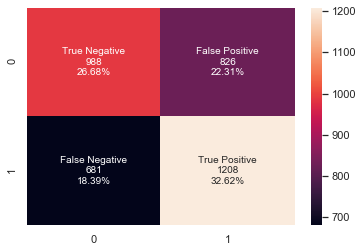

In [14]:
score_lg = compute_cross_val(LogisticRegression(), X, y)
print('Cross Validation Score of LogisticRegression: {}'.format(score_lg))

predicted_lg = cross_val_predict(LogisticRegression(), X, y)
report_lg = classification_report(y, predicted_lg)
print("Classification report for Logistic Regression: \n{}".format(report_lg))

#confusion matrix
confusion_matrix_display(y, predicted_lg, 'Logistic Regression')

## Random Forest Classifer

Cross Validation Score of Random Forest Classifier: 0.8701046795783638
Classification report for Random Forest Classifier: 
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1814
           1       0.87      0.88      0.87      1889

    accuracy                           0.87      3703
   macro avg       0.87      0.87      0.87      3703
weighted avg       0.87      0.87      0.87      3703

Confusion Matrix for Random Forest Classifier cross validated:


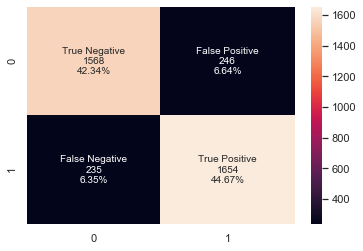

In [15]:
score_rf = compute_cross_val(RandomForestClassifier(random_state=SEED), X, y)
print('Cross Validation Score of Random Forest Classifier: {}'.format(score_rf))

predicted_rf = cross_val_predict(RandomForestClassifier(random_state=SEED), X, y)
report_rf = classification_report(y, predicted_rf)
print("Classification report for Random Forest Classifier: \n{}".format(report_rf))

#confusion matrix
confusion_matrix_display(y, predicted_rf, 'Random Forest Classifier')

## Gradient Boosting Classifier

Cross Validation Score of Gradient Boosting Classifier: 0.820958529379582
Classification report for Gradient Boosting Classifier: 
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1814
           1       0.82      0.83      0.82      1889

    accuracy                           0.82      3703
   macro avg       0.82      0.82      0.82      3703
weighted avg       0.82      0.82      0.82      3703

Confusion Matrix for Gradient Boosting Classifier cross validated:


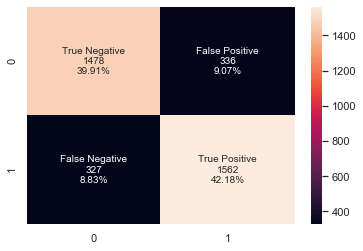

In [16]:
score_gbc = compute_cross_val(GradientBoostingClassifier(random_state=SEED), X, y)
print('Cross Validation Score of Gradient Boosting Classifier: {}'.format(score_gbc))

predicted_gbc = cross_val_predict(GradientBoostingClassifier(random_state=SEED), X, y)
report_gbc = classification_report(y, predicted_gbc)
print("Classification report for Gradient Boosting Classifier: \n{}".format(report_gbc))

#confusion matrix
confusion_matrix_display(y, predicted_gbc, 'Gradient Boosting Classifier')

## XGBoost Classifier

Cross Validation Score of XGBoost Classifier: 0.8150184192289455
Classification report for XGBoost Classifier: 
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1814
           1       0.82      0.82      0.82      1889

    accuracy                           0.82      3703
   macro avg       0.81      0.81      0.81      3703
weighted avg       0.82      0.82      0.82      3703

Confusion Matrix for XGBoost Classifier cross validated:


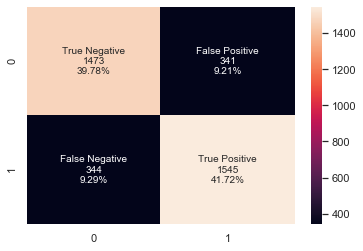

In [17]:
score_xgb = compute_cross_val(XGBClassifier(random_state=SEED), X, y)
print('Cross Validation Score of XGBoost Classifier: {}'.format(score_xgb))

predicted_xgb = cross_val_predict(XGBClassifier(random_state=SEED), X, y)
report_xgb = classification_report(y, predicted_xgb)
print("Classification report for XGBoost Classifier: \n{}".format(report_xgb))

#confusion matrix
confusion_matrix_display(y, predicted_xgb, 'XGBoost Classifier')

## LightGBM Classifier

Cross Validation Score of LIGHTGBM Classifier: 0.8660546376335849
Classification report for LIGHTGBM Classifier: 
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1814
           1       0.87      0.86      0.87      1889

    accuracy                           0.87      3703
   macro avg       0.87      0.87      0.87      3703
weighted avg       0.87      0.87      0.87      3703

Confusion Matrix for LIGHTGBM Classifier cross validated:


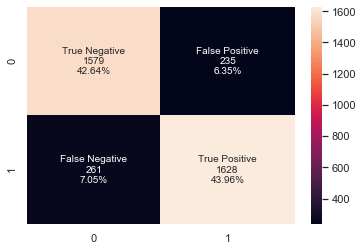

In [18]:
score_lgbm = compute_cross_val(LGBMClassifier(random_state=SEED), X, y)
print('Cross Validation Score of LIGHTGBM Classifier: {}'.format(score_lgbm))

predicted_lgbm = cross_val_predict(LGBMClassifier(random_state=SEED), X, y)
report_lgbm = classification_report(y, predicted_lgbm)
print("Classification report for LIGHTGBM Classifier: \n{}".format(report_lgbm))

#confusion matrix
confusion_matrix_display(y, predicted_lgbm, 'LIGHTGBM Classifier')

# Saving Model For Deployment 

In [21]:
rf_model = RandomForestClassifier(random_state=SEED)
rf_model = rf_model.fit(X, y)
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [22]:
filename = 'rf_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))